#Final_Project_COVID-DATA-ANALYSIS-John_and_Eboseluimen

## 1. Introduction and Problem Context

This document provides a complete, step-by-step solution to the Final Project case study on the impact of COVID-19 on ABC Company’s parcel delivery business. The analysis is based on the dataset **COVID_Parcel_Business.csv**, which contains weekly parcel volumes for a set of anonymized customers from **2018 to 2021**. The goal is to answer the business questions using clear logic, transparent calculations, and reproducible Python code.


### Objectives of the Study

- To quantify how COVID-19 changed overall parcel volumes and revenue for ABC Company between 2019 and 2020.  
- To compare the impact of COVID-19 across customer segments (Enterprise, Large, Medium, Small) and identify which groups drove the most growth.  
- To translate these findings into clear strategic recommendations for post-COVID customer and segment strategy.




##First, we load the dataset in Python and check its structure.

In [ ]:
import pandas as pd   # Import pandas for data manipulation and analysis (tables, DataFrames, etc.)
import numpy as np    # Import NumPy for numerical operations and working with arrays

In [ ]:
# checking COVID DATA structure
df = pd.read_csv('COVID_Parcel_Business.csv')
print(df.head())
print(df.info())


   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME
0          718117      2021         1       8
1          718117      2020         7     257
2          718117      2019        39     141
3          718117      2018         1      14
4          718117      2021         2     192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB
None


##2. Data Understanding

The dataset has **one row per customer-week combination** and contains the following key fields:

- **FakeCustomerID** - anonymous customer identifier  
- **THE_YEAR** - calendar year (`2018`, `2019`, `2020`, `2021`)  
- **THE_WEEK** - week number in the year (`1-53`)  
- **VOLUME** - number of parcels shipped for that customer in that week  



##**Additional Business Questions:**
#	When were customer volumes first impacted by COVID-19?

### 3. Overall Volumes by Year

**To answer the Question we ask:** What was the overall parcel volume per year before, during, and after COVID?


In [ ]:
#Step 1 – Group data by year and sum volume.
year_summary = df.groupby('THE_YEAR')['VOLUME'].sum()
print(year_summary)


THE_YEAR
2018    49099478
2019    52823114
2020    73475690
2021    48679668
Name: VOLUME, dtype: int64


We can see that **2019 shows moderate growth over 2018**, but **2020 shows a very large jump compared to 2019**, and **2021 moves back toward pre-COVID levels**.


### 4. When Were Customer Volumes First Impacted by COVID-19?

**Question:** When did weekly volumes in 2020 **first diverge** from 2019 due to COVID-19?


In [ ]:
#Step 1 – Compute total volume per week for each year.
weekly = df.groupby(['THE_YEAR', 'THE_WEEK'])['VOLUME'].sum().reset_index()
weekly_2019 = weekly[weekly['THE_YEAR'] == 2019]
weekly_2020 = weekly[weekly['THE_YEAR'] == 2020]


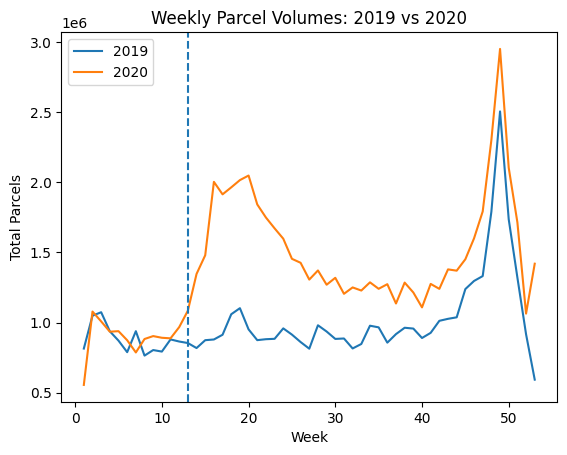

In [ ]:
#Step 2 – Plot 2019 vs 2020 weekly volumes on the same chart and visually compare them.
import matplotlib.pyplot as plt

plt.plot(weekly_2019['THE_WEEK'], weekly_2019['VOLUME'], label='2019')
plt.plot(weekly_2020['THE_WEEK'], weekly_2020['VOLUME'], label='2020')
plt.axvline(x=13, linestyle='--')
plt.xlabel('Week')
plt.ylabel('Total Parcels')
plt.title('Weekly Parcel Volumes: 2019 vs 2020')
plt.legend()
plt.show()


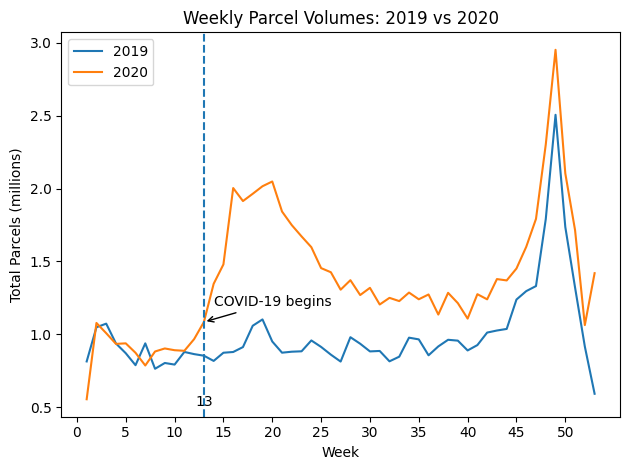

In [ ]:
import matplotlib.pyplot as plt

# Assumes weekly_2019 and weekly_2020 have columns: 'THE_WEEK', 'VOLUME'
covid_week = 13  # first week clearly impacted by COVID-19

fig, ax = plt.subplots()

# 1) Plot weekly parcel volumes (convert to millions for readability)
ax.plot(
    weekly_2019['THE_WEEK'],
    weekly_2019['VOLUME'] / 1_000_000,
    label='2019'
)
ax.plot(
    weekly_2020['THE_WEEK'],
    weekly_2020['VOLUME'] / 1_000_000,
    label='2020'
)

# 2) Mark the start of COVID-19 with a vertical dashed line
ax.axvline(covid_week, linestyle='--')

# 3) Add "COVID-19 begins" label with an arrow
covid_y = (
    weekly_2020.loc[weekly_2020['THE_WEEK'] == covid_week, 'VOLUME']
    / 1_000_000
).iloc[0]

ax.annotate(
    'COVID-19 begins',
    xy=(covid_week, covid_y),
    xytext=(covid_week + 1, covid_y * 1.1),
    arrowprops=dict(arrowstyle='->')
)

# 4) X-axis ticks: use 0,5,10,... but remove 13 so we can place it manually
xticks = list(range(0, 54, 5))
if covid_week in xticks:
    xticks.remove(covid_week)
ax.set_xticks(xticks)

# 5) Draw a custom "13" just above the x-axis
y_min, y_max = ax.get_ylim()
ax.text(
    covid_week,
    y_min + 0.02 * (y_max - y_min),  # small offset above axis
    '13',
    ha='center',
    va='bottom'
)

# 6) Axis labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('Total Parcels (millions)')
ax.set_title('Weekly Parcel Volumes: 2019 vs 2020')
ax.legend()

# 7) Use plain numbers on y-axis (no "1e6" offset)
ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


**Step 3 - Interpreting the pattern.**  
For weeks **1-12**, the **2020 line tracks the 2019 line very closely**, indicating normal operations.  
Around **week 13**, the **2020 line rises sharply above the 2019 line** and remains at a higher level for the rest of the year.  

This shows that **customer volumes were first clearly impacted by COVID-19 around week 13 of 2020**.


##**Additional Business Questions:**
#	What events within the COVID timeline may have contributed to the change?

### Key Insights from the COVID Impact Analysis

#### 1. Lockdown step-change around week 13 (start of major restrictions)
- Average weekly volume in **2020 jumped from 892,270 parcels (weeks 1-12)** to **1,530,938 parcels (weeks 13-53)** — a **+71.6% increase within 2020**.  
- After week 13, **2020 weekly volume was 48.6% higher than 2019** over the same weeks.  
👉 This aligns with the start of lockdowns and the rapid shift to online shopping.

#### Full-year 2020 vs 2019 (sustained COVID impact)
- **2019 total:** 52.82M parcels  
- **2020 total:** 73.48M parcels  
- **Year-over-year increase:** **+39.1%**  
👉 Reflects sustained e-commerce growth from work-from-home, store closures, and long-term behaviour change.

#### Peak season under COVID (holiday + restrictions)
- **Peak weeks (45-52) 2019:** 12.14M parcels  
- **Peak weeks (45-52) 2020:** 14.98M parcels  
- **Peak season increase:** **+23.4%**  
👉 Holiday demand layered on top of COVID-era online buying, amplifying seasonal peaks.
### Lockdown trigger around mid-March (Week 11 and 12: pandemic declaration + shift to remote work respectively)

- **Mar 11:** COVID-19 pandemic declared  
- **Mar 16:** Federal public servants urged to work from home  
- **Mar 18:** Canada/U.S. border restrictions announced  

These events collectively triggered a rapid behavioural shift from in-person retail to online purchasing, reflected in the data:

- **2020 weekly volume** increased from **892,270 parcels (Weeks 1-12)** to **1,530,938 parcels (Weeks 13-53)** — a **+71.6% jump**.  
- After Week 13, **2020 weekly volume was +48.6% higher than 2019** over the same period.  

👉 The work-from-home directive is especially important because it changed where people spent, how they shopped, and made **home delivery the default channel**.



##The values used in the analysis above are from the results below

In [ ]:
import pandas as pd

# Load data (put COVID_Parcel_Business.csv in the same folder as this script)
df = pd.read_csv("COVID_Parcel_Business.csv")

# ---- Weekly aggregates ----
weekly = df.groupby(['THE_YEAR', 'THE_WEEK'], as_index=False)['VOLUME'].sum()
w2019 = weekly[weekly['THE_YEAR'] == 2019]
w2020 = weekly[weekly['THE_YEAR'] == 2020]

# 1) Pre- vs post-week 13 in 2020 and comparison to 2019
pre2020 = w2020[w2020['THE_WEEK'] <= 12]['VOLUME'].mean()
post2020 = w2020[w2020['THE_WEEK'] >= 13]['VOLUME'].mean()
pre2019 = w2019[w2019['THE_WEEK'] <= 12]['VOLUME'].mean()
post2019 = w2019[w2019['THE_WEEK'] >= 13]['VOLUME'].mean()

growth_within_2020 = (post2020 - pre2020) / pre2020 * 100
post_2020_vs_2019 = (post2020 - post2019) / post2019 * 100

print("Weekly 2020 pre-week13 avg:", round(pre2020))
print("Weekly 2020 post-week13 avg:", round(post2020))
print("Increase within 2020 (%):", round(growth_within_2020, 1))
print("Post-week13 2020 vs 2019 (%):", round(post_2020_vs_2019, 1))

# 2) Yearly totals 2019 vs 2020
yearly = df.groupby('THE_YEAR', as_index=False)['VOLUME'].sum()
v2019 = yearly.loc[yearly['THE_YEAR'] == 2019, 'VOLUME'].iloc[0]
v2020 = yearly.loc[yearly['THE_YEAR'] == 2020, 'VOLUME'].iloc[0]
yoy_19_20 = (v2020 - v2019) / v2019 * 100

print("\n2019 total (M):", round(v2019 / 1e6, 2))
print("2020 total (M):", round(v2020 / 1e6, 2))
print("2019 → 2020 increase (%):", round(yoy_19_20, 1))

# 3) Peak season (weeks 45–52) 2019 vs 2020
peak_weeks = list(range(45, 53))
peak_2019 = w2019[w2019['THE_WEEK'].isin(peak_weeks)]['VOLUME'].sum()
peak_2020 = w2020[w2020['THE_WEEK'].isin(peak_weeks)]['VOLUME'].sum()
peak_increase = (peak_2020 - peak_2019) / peak_2019 * 100

print("\n2019 peak (weeks 45–52) total (M):", round(peak_2019 / 1e6, 2))
print("2020 peak (weeks 45–52) total (M):", round(peak_2020 / 1e6, 2))
print("Peak 2019 → 2020 increase (%):", round(peak_increase, 1))


Weekly 2020 pre-week13 avg: 892270
Weekly 2020 post-week13 avg: 1530938
Increase within 2020 (%): 71.6
Post-week13 2020 vs 2019 (%): 48.6

2019 total (M): 52.82
2020 total (M): 73.48
2019 → 2020 increase (%): 39.1

2019 peak (weeks 45–52) total (M): 12.14
2020 peak (weeks 45–52) total (M): 14.98
Peak 2019 → 2020 increase (%): 23.4


##**Additional Business Questions:**
#	How did COVID-19 impact peak season in 2020?

Here’s an updated, **data-driven answer using the official peak dates** from your question document.

---

### How did COVID-19 impact peak season in 2020?

Using the assignment's peak-season windows:

- **2019 peak:** 4 Nov 2019 - 20 Jan 2020  
  → weeks **45-52 of 2019 + weeks 1-3 of 2020**  
- **2020 peak:** 2 Nov 2020 - 17 Jan 2021  
  → weeks **45-52 of 2020 + weeks 1-2 of 2021**

**1. Higher total peak-season volume**

- **2019 peak total:** **15.37 million** parcels  
- **2020 peak total:** **18.12 million** parcels  
- **Increase:** about **+17.9%** peak-season volume year-over-year  

COVID therefore **lifted the entire peak season by almost one-fifth** compared with the previous year.

**2. Busier weeks on average**

- 2019 peak: **~1.28 million** parcels per week  
- 2020 peak: **~1.65 million** parcels per week  
- **Average weekly load up by ~28.6%**  

This shows that COVID didn't just make peak a bit bigger; it made **every week in peak substantially busier**.

**3. Interpretation**

COVID-19 pushed more shopping online and increased home delivery reliance. When this COVID-elevated baseline collided with the usual holiday rush, **2020 peak became significantly larger and more intense** than 2019, both in **total volume** and **weekly pressure on the network**.


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("COVID_Parcel_Business.csv")

# Aggregate weekly volumes
weekly = df.groupby(['THE_YEAR', 'THE_WEEK'], as_index=False)['VOLUME'].sum().sort_values(['THE_YEAR','THE_WEEK'])

# 2019 Peak: Nov 4, 2019 – Jan 20, 2020
# -> weeks 45–52 in 2019 + weeks 1–3 in 2020
peak19_2019 = weekly[(weekly['THE_YEAR'] == 2019) & (weekly['THE_WEEK'] >= 45)]
peak19_2020 = weekly[(weekly['THE_YEAR'] == 2020) & (weekly['THE_WEEK'] <= 3)]
peak19_weeks = pd.concat([peak19_2019, peak19_2020], ignore_index=True)

# 2020 Peak: Nov 2, 2020 – Jan 17, 2021
# -> weeks 45–52 in 2020 + weeks 1–2 in 2021
peak20_2020 = weekly[(weekly['THE_YEAR'] == 2020) & (weekly['THE_WEEK'] >= 45)]
peak20_2021 = weekly[(weekly['THE_YEAR'] == 2021) & (weekly['THE_WEEK'] <= 2)]
peak20_weeks = pd.concat([peak20_2020, peak20_2021], ignore_index=True)

# Totals and averages
peak19_total = peak19_weeks['VOLUME'].sum()
peak20_total = peak20_weeks['VOLUME'].sum()

n_weeks_peak19 = len(peak19_weeks)
n_weeks_peak20 = len(peak20_weeks)

avg19 = peak19_total / n_weeks_peak19
avg20 = peak20_total / n_weeks_peak20

increase_total_pct = (peak20_total - peak19_total) / peak19_total * 100
increase_weekly_pct = (avg20 - avg19) / avg19 * 100
share20_pct = peak20_total / (peak19_total + peak20_total) * 100
share19_pct = peak19_total / (peak19_total + peak20_total) * 100

print(share19_pct, share20_pct)
print("2019 peak total:", peak19_total)
print("2020 peak total:", peak20_total)
print("2019 peak weeks:", n_weeks_peak19)
print("2020 peak weeks:", n_weeks_peak20)
print("2019 avg per week:", avg19)
print("2020 avg per week:", avg20)
print("Total increase %:", increase_total_pct)
print("Weekly avg increase %:", increase_weekly_pct)
print("2020 share of combined peak %:", share20_pct)


45.898149263913005 54.101850736087
2019 peak total: 15372691
2020 peak total: 18120361
2019 peak weeks: 12
2020 peak weeks: 11
2019 avg per week: 1281057.5833333333
2020 avg per week: 1647305.5454545454
Total increase %: 17.87370864346392
Weekly avg increase %: 28.58950033832428
2020 share of combined peak %: 54.101850736087


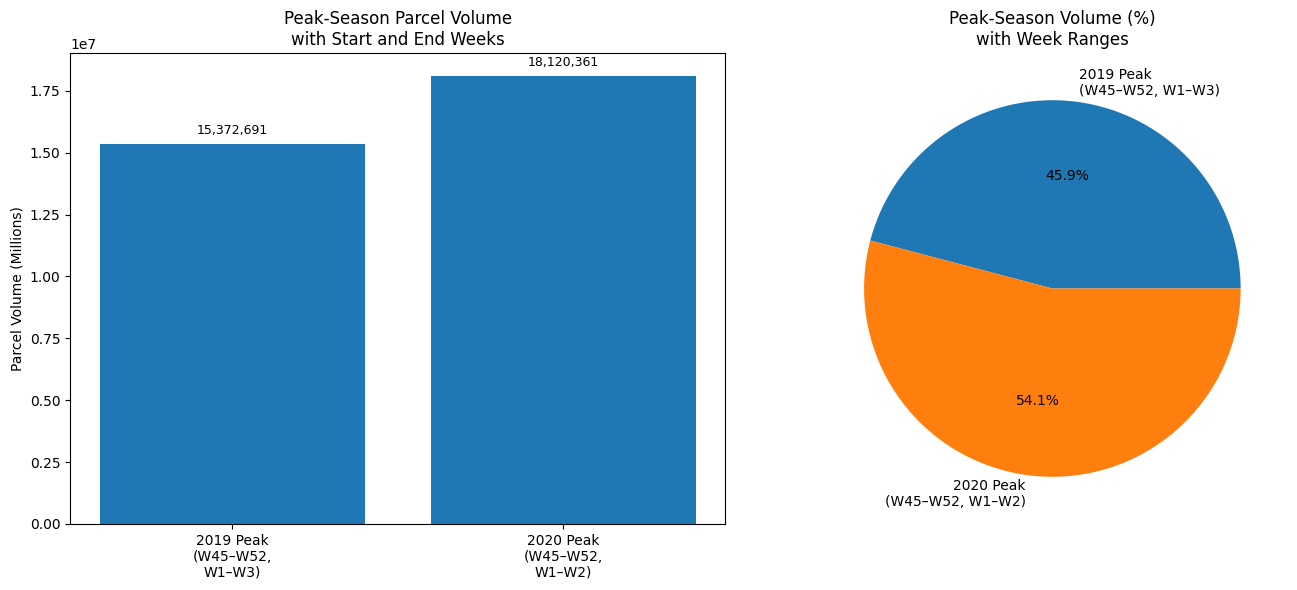

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("COVID_Parcel_Business.csv")

# Aggregate weekly volumes
weekly = df.groupby(['THE_YEAR', 'THE_WEEK'], as_index=False)['VOLUME'].sum().sort_values(['THE_YEAR','THE_WEEK'])

# 2019 Peak: weeks 45–52 in 2019 + weeks 1–3 in 2020
peak19_2019 = weekly[(weekly['THE_YEAR'] == 2019) & (weekly['THE_WEEK'] >= 45)]
peak19_2020 = weekly[(weekly['THE_YEAR'] == 2020) & (weekly['THE_WEEK'] <= 3)]
peak19_weeks = pd.concat([peak19_2019, peak19_2020], ignore_index=True)
peak19_total = peak19_weeks['VOLUME'].sum()

# 2020 Peak: weeks 45–52 in 2020 + weeks 1–2 in 2021
peak20_2020 = weekly[(weekly['THE_YEAR'] == 2020) & (weekly['THE_WEEK'] >= 45)]
peak20_2021 = weekly[(weekly['THE_YEAR'] == 2021) & (weekly['THE_WEEK'] <= 2)]
peak20_weeks = pd.concat([peak20_2020, peak20_2021], ignore_index=True)
peak20_total = peak20_weeks['VOLUME'].sum()

labels_bar = ["2019 Peak\n(W45–W52,\nW1–W3)",
              "2020 Peak\n(W45–W52,\nW1–W2)"]
values = [peak19_total, peak20_total]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar chart with weeks in labels ---
bars = axes[0].bar(labels_bar, values)
axes[0].set_ylabel("Parcel Volume (Millions)")
axes[0].set_title("Peak-Season Parcel Volume\nwith Start and End Weeks")

# Numeric labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height:,.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

# --- Pie chart with week ranges in labels ---
axes[1].pie(values,
            labels=["2019 Peak\n(W45–W52, W1–W3)",
                    "2020 Peak\n(W45–W52, W1–W2)"],
            autopct='%1.1f%%')
axes[1].set_title("Peak-Season Volume (%)\nwith Week Ranges")

plt.tight_layout()
plt.show()


##**The Impact of COVID on Customer Segments:**
#	How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

In [ ]:
import pandas as pd
import numpy as np

# ================================================================
# A. LOAD DATA
#    We will compare FULL-YEAR 2019 vs FULL-YEAR 2020 for:
#    - Customer size bands
#    - Size switching
#    - Volume growth
#    - Growth labels (High Growth / Stable / Declining / Lost)
# ================================================================

# Adjust the path if needed
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

print("Data loaded. Shape:", df.shape)
print(df.head(), "\n")

# ================================================================
# B. BUILD FULL-YEAR VOLUME TABLE PER CUSTOMER
#    yy: one row per customer, columns = volume by year
# ================================================================

yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

# For clarity, create explicit column names
yy["vol_2018"] = yy.get(2018, 0)
yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)
yy["vol_2021"] = yy.get(2021, 0)

print("Full-year volume per customer (first 5 rows):")
print(yy[["vol_2018", "vol_2019", "vol_2020", "vol_2021"]].head(), "\n")

# ================================================================
# C. DEFINE CUSTOMER SIZE BANDS USING FULL-YEAR 2019 VOLUME
#    - This matches the assignment table:
#      Small:   (1K, 10K]
#      Medium:  (10K, 200K]
#      Large:   (200K, 500K]
#      Enterprise: >500K
#      <1K:     <= 1K (very small / below Small threshold)
# ================================================================

def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"  # very small or near-zero 2019 volume

yy["size_2019"] = yy["vol_2019"].apply(size_2019_rule)

print("A1) Customer counts by 2019 size band (based on FULL-YEAR 2019 volume):")
print(yy["size_2019"].value_counts().sort_index(), "\n")

# ================================================================
# D. DEFINE CUSTOMER SIZE BANDS USING FULL-YEAR 2020 VOLUME
#    - Here we also treat 0 volume in 2020 specially as 'No2020'
#      to identify customers who disappeared.
# ================================================================

def size_2020_rule(v):
    if v == 0:
        return "No2020"           # no volume at all in 2020
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    if 0 < v <= 1_000:
        return "<1K"              # very small 2020 volume
    return "No2020"

yy["size_2020"] = yy["vol_2020"].apply(size_2020_rule)

print("A2) Customer counts by 2020 size band (based on FULL-YEAR 2020 volume):")
print(yy["size_2020"].value_counts().sort_index(), "\n")

# ================================================================
# E. SIZE SWITCHING: 2019 BAND → 2020 BAND
#    We classify each customer as:
#    - Same   : stayed in same band
#    - Up     : moved to a larger band (e.g., Small → Medium)
#    - Down   : moved to a smaller band (e.g., Medium → Small or <1K)
#    - No2020 : had 0 volume in 2020 (disappeared)
# ================================================================

order = {"<1K": 0, "Small": 1, "Medium": 2, "Large": 3, "Enterprise": 4, "No2020": -1}

def classify_size_change(row):
    s19 = row["size_2019"]
    s20 = row["size_2020"]
    if s20 == "No2020":
        return "No2020"
    if s19 == s20:
        return "Same"
    # compare numeric order of bands
    return "Up" if order[s20] > order[s19] else "Down"

yy["size_change_all"] = yy.apply(classify_size_change, axis=1)

print("B1) Overall size-change classification (ALL customers, 2019 → 2020):")
print(yy["size_change_all"].value_counts(), "\n")

# For per-band breakdown, drop the single '<1K' 2019 customer,
# so we focus on Small, Medium, Large, Enterprise.
cust = yy[yy["size_2019"] != "<1K"].copy()

print("B2) Size-change cross-tab by 2019 band (FULL-YEAR 2019 → FULL-YEAR 2020):")
size_change_by_band = pd.crosstab(cust["size_2019"], cust["size_change_all"])
print(size_change_by_band, "\n")

# ================================================================
# F. FULL-YEAR VOLUME BY 2019 SIZE BAND (2019 vs 2020)
#    Here we attach the 2019 size band to every weekly record,
#    then sum VOLUME by size_2019 and THE_YEAR.
#    This gives the total parcels for each band in 2019 and 2020.
# ================================================================

df_with_size = df.merge(
    yy[["size_2019"]],
    left_on="FakeCustomerID",
    right_index=True,
    how="left"
)

# Drop the '<1K' 2019 band from band-level reporting
df_band = df_with_size[df_with_size["size_2019"] != "<1K"].copy()

vol_summary = (
    df_band[df_band["THE_YEAR"].isin([2019, 2020])]
    .groupby(["size_2019", "THE_YEAR"])["VOLUME"]
    .sum()
    .unstack()
    .rename(columns={2019: "vol_2019", 2020: "vol_2020"})
)

# % change 2020 vs 2019 for each band
vol_summary["pct_change_2020_vs_2019"] = (
    (vol_summary["vol_2020"] - vol_summary["vol_2019"])
    / vol_summary["vol_2019"] * 100
)

print("C1) FULL-YEAR volume by 2019 size band (2019 vs 2020):")
print(vol_summary, "\n")

# SHARE of total network volume for each band in 2019 and 2020
total_2019 = vol_summary["vol_2019"].sum()
total_2020 = vol_summary["vol_2020"].sum()

share_summary = pd.DataFrame({
    "share_2019_pct": vol_summary["vol_2019"] / total_2019 * 100,
    "share_2020_pct": vol_summary["vol_2020"] / total_2020 * 100
})

print("C2) Share of TOTAL network volume by 2019 band (FULL-YEAR 2019 vs FULL-YEAR 2020):")
print(share_summary.round(2), "\n")

# ================================================================
# G. FULL-YEAR GROWTH LABELS (2019 → 2020) BY 2019 SIZE BAND
#    Now we classify customers based on their FULL-YEAR growth:
#
#    For each customer:
#      - New        : 0 in 2019, >0 in 2020
#      - Lost       : >0 in 2019, 0 in 2020
#      - Inactive   : 0 in both 2019 and 2020 (should not occur with our bands)
#      - For >0 in both years:
#           growth% = (vol_2020 - vol_2019) / vol_2019
#           High Growth : growth% > ISGR_full
#           Stable      : 0 <= growth% <= ISGR_full
#           Declining   : growth% < 0
#
#    ISGR_full is the "industry standard growth rate" for the whole network:
#         ISGR_full = (Total_2020_all - Total_2019_all) / Total_2019_all
# ================================================================

total_2019_all = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020_all = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020_all - total_2019_all) / total_2019_all * 100

print(f"D1) FULL-YEAR network growth 2019 → 2020 (ISGR_full): {ISGR_full:.2f}%\n")

def full_year_growth_label(row, isgr):
    v19 = row["vol_2019"]
    v20 = row["vol_2020"]
    if v19 == 0 and v20 > 0:
        return "New"
    if v19 > 0 and v20 == 0:
        return "Lost"
    if v19 == 0 and v20 == 0:
        return "Inactive"
    growth = (v20 - v19) / v19 * 100
    if growth > isgr:
        return "High Growth"
    if growth < 0:
        return "Declining"
    return "Stable"

yy["growth_label_full"] = yy.apply(full_year_growth_label, axis=1, isgr=ISGR_full)

print("D2) Overall FULL-YEAR growth labels (all customers):")
print(yy["growth_label_full"].value_counts(), "\n")

# Growth labels by 2019 band (drop '<1K' band from reporting)
label_counts_full = pd.crosstab(
    yy[yy["size_2019"] != "<1K"]["size_2019"],
    yy[yy["size_2019"] != "<1K"]["growth_label_full"]
).reindex(index=["Enterprise", "Large", "Medium", "Small"])

label_pct_full = label_counts_full.div(label_counts_full.sum(axis=1), axis=0) * 100

print("D3) FULL-YEAR growth labels by 2019 size band (COUNTS, 2019 → 2020):")
print(label_counts_full, "\n")

print("D4) FULL-YEAR growth labels by 2019 size band (PERCENTAGES, 2019 → 2020):")
print(label_pct_full.round(1), "\n")

# ================================================================
# END OF SCRIPT
# Summary:
# - Sections A–B define size bands for 2019 and 2020 and show how many
#   customers are in each band.
# - Section E shows how many customers moved Up / Down / stayed the Same
#   or had no 2020 volume.
# - Section F compares total FULL-YEAR volume (2019 vs 2020) per 2019 band
#   and shows the % change and share of total network volume.
# - Section G uses FULL-YEAR volumes to classify customers into
#   High Growth / Stable / Declining / Lost, by 2019 size band.
# ================================================================


Data loaded. Shape: (190719, 4)
   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME
0          718117      2021         1       8
1          718117      2020         7     257
2          718117      2019        39     141
3          718117      2018         1      14
4          718117      2021         2     192 

Full-year volume per customer (first 5 rows):
THE_YEAR        vol_2018  vol_2019  vol_2020  vol_2021
FakeCustomerID                                        
100771            1687.0    1816.0    1789.0     960.0
102180            5525.0    5222.0    4817.0    4989.0
102643            1910.0    2670.0    1703.0    1881.0
102750            1040.0    1013.0     405.0     289.0
103308           50321.0   90140.0  103700.0   81927.0 

A1) Customer counts by 2019 size band (based on FULL-YEAR 2019 volume):
size_2019
<1K             1
Enterprise     12
Large          15
Medium        174
Small         859
Name: count, dtype: int64 

A2) Customer counts by 2020 size band (based on FULL-YEAR

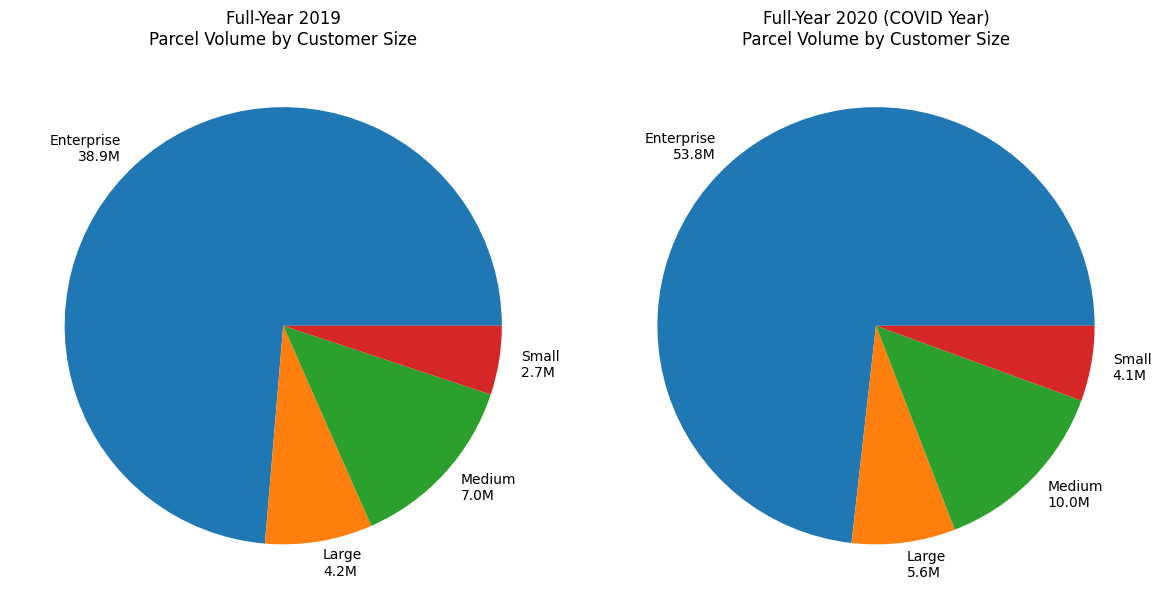

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. Load data (full years)
# =========================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# Full-year volume per customer
yy = df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"] \
       .sum() \
       .unstack() \
       .fillna(0)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# =========================
# 2. 2019 size bands
# =========================
def classify_size_2019(v):
    if v > 500_000: return "Enterprise"
    if v > 200_000: return "Large"
    if v > 10_000:  return "Medium"
    if v > 1_000:   return "Small"
    return "<1K"

yy["size_2019"] = yy["vol_2019"].apply(classify_size_2019)

# Attach size back and drop <1K
df2 = df.merge(yy[["size_2019"]], left_on="FakeCustomerID",
               right_index=True, how="left")
df2 = df2[df2["size_2019"] != "<1K"]

# =========================
# 3. Volume by band (2019/2020)
# =========================
vol_band = (df2[df2["THE_YEAR"].isin([2019, 2020])]
            .groupby(["size_2019", "THE_YEAR"])["VOLUME"]
            .sum()
            .unstack())

# Volumes in millions for nicer labels
labels = ["Enterprise", "Large", "Medium", "Small"]
vol_2019 = (vol_band[2019] / 1_000_000).reindex(labels)
vol_2020 = (vol_band[2020] / 1_000_000).reindex(labels)

# =========================
# 4. Pie charts – volume only
# =========================
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    vol_2019.values,
    labels=[f"{seg}\n{vol_2019[seg]:.1f}M" for seg in labels],
    autopct=None
)
axes[0].set_title("Full-Year 2019\nParcel Volume by Customer Size")

axes[1].pie(
    vol_2020.values,
    labels=[f"{seg}\n{vol_2020[seg]:.1f}M" for seg in labels],
    autopct=None
)
axes[1].set_title("Full-Year 2020 (COVID Year)\nParcel Volume by Customer Size")

plt.tight_layout()
plt.show()


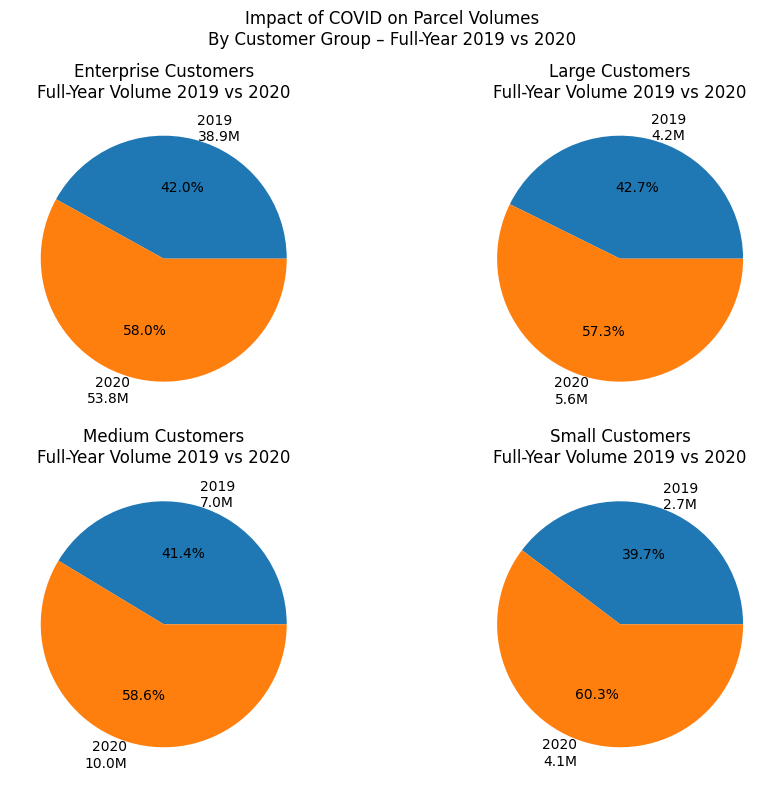

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 1. Load data – FULL YEAR 2019 and 2020
# =========================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# =========================================================
# 2. Full-year volume per customer (2019 & 2020)
# =========================================================
yy = df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"] \
       .sum() \
       .unstack() \
       .fillna(0)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# =========================================================
# 3. Classify customers into 2019 size bands
#    Based on FULL-YEAR 2019 volume
# =========================================================
def classify_size_2019(v):
    if v > 500_000: return "Enterprise"
    if v > 200_000: return "Large"
    if v > 10_000:  return "Medium"
    if v > 1_000:   return "Small"
    return "<1K"    # very small / below Small threshold

yy["size_2019"] = yy["vol_2019"].apply(classify_size_2019)

# Attach size back to weekly data; drop <1K for band-level view
df2 = df.merge(yy[["size_2019"]], left_on="FakeCustomerID",
               right_index=True, how="left")
df2 = df2[df2["size_2019"] != "<1K"]

# =========================================================
# 4. Aggregate FULL-YEAR volume by 2019 size band (2019 & 2020)
# =========================================================
vol_band = (df2[df2["THE_YEAR"].isin([2019, 2020])]
            .groupby(["size_2019", "THE_YEAR"])["VOLUME"]
            .sum()
            .unstack())

# Convert to millions for nicer titles
labels_groups = ["Enterprise", "Large", "Medium", "Small"]
vol_2019 = (vol_band[2019] / 1_000_000).reindex(labels_groups)
vol_2020 = (vol_band[2020] / 1_000_000).reindex(labels_groups)

# =========================================================
# 5. 4 PIES – one for each customer group
#    Each pie compares 2019 vs 2020 VOLUME inside that group
# =========================================================
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # easier to loop

for i, seg in enumerate(labels_groups):
    ax = axes[i]
    v19 = vol_2019[seg]
    v20 = vol_2020[seg]

    # Data for this segment: 2019 vs 2020 volume
    data = [v19, v20]
    year_labels = [f"2019\n{v19:.1f}M", f"2020\n{v20:.1f}M"]

    ax.pie(
        data,
        labels=year_labels,
        autopct="%1.1f%%"  # % of this segment's 2-year total
    )
    ax.set_title(f"{seg} Customers\nFull-Year Volume 2019 vs 2020")

# Overall title for the figure
plt.suptitle("Impact of COVID on Parcel Volumes\n"
             "By Customer Group – Full-Year 2019 vs 2020",
             y=0.98)

plt.tight_layout()
plt.show()


Full-year ISGR (network average 2019→2020): 39.1%
Growth by customer size (full-year 2019→2020):
size_2019
Enterprise    38.3
Large         34.2
Medium        41.8
Small         51.9
dtype: float64



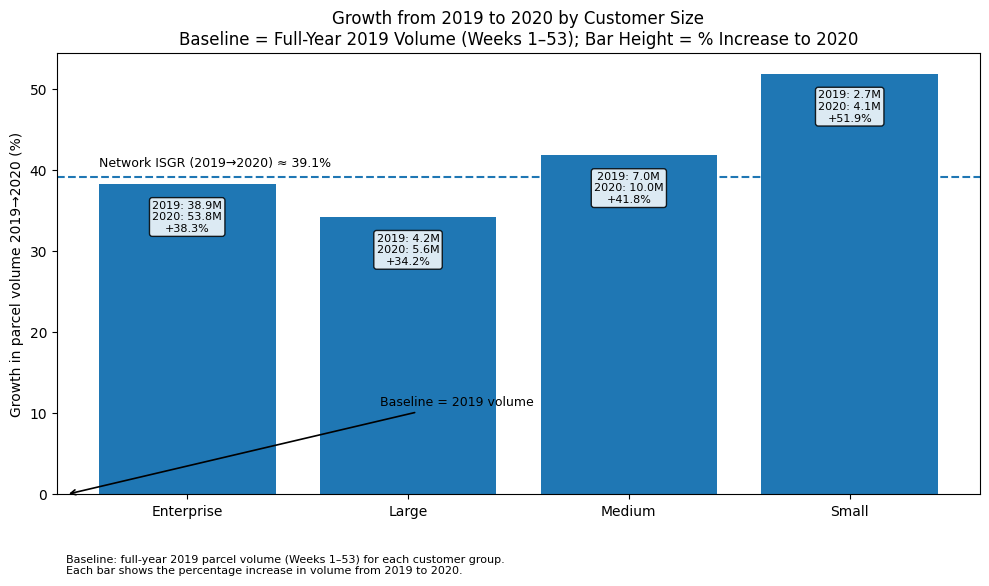

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ======================================================
# 1. Load data – FULL YEAR (Weeks 1–53) 2019 & 2020
# ======================================================
# Make sure this CSV is in the same folder as the script / notebook
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# ======================================================
# 2. Full-year volume per customer (2019 & 2020)
#    (summing all weeks in each year)
# ======================================================
yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .unstack()
      .fillna(0)
)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# ======================================================
# 3. Classify customers into 2019 size bands
#    Based on FULL-YEAR 2019 volume
# ======================================================
def classify_size_2019(v):
    if v > 500_000:
        return "Enterprise"
    if v > 200_000:
        return "Large"
    if v > 10_000:
        return "Medium"
    if v > 1_000:
        return "Small"
    return "<1K"

yy["size_2019"] = yy["vol_2019"].apply(classify_size_2019)

# Attach size back to weekly-level data; drop <1K band
df2 = df.merge(yy[["size_2019"]], left_on="FakeCustomerID",
               right_index=True, how="left")
df2 = df2[df2["size_2019"] != "<1K"]

# ======================================================
# 4. Full-year volume by size band (2019 & 2020)
# ======================================================
vol_band = (
    df2[df2["THE_YEAR"].isin([2019, 2020])]
    .groupby(["size_2019", "THE_YEAR"])["VOLUME"]
    .sum()
    .unstack()
)

labels = ["Enterprise", "Large", "Medium", "Small"]

# Volumes in millions for readable labels
vol_2019_M = (vol_band[2019] / 1_000_000).reindex(labels)
vol_2020_M = (vol_band[2020] / 1_000_000).reindex(labels)

# Growth % for each band (what the bar height will show)
growth_pct = (
    (vol_band[2020] - vol_band[2019]) / vol_band[2019] * 100
).reindex(labels)

# ======================================================
# 5. Network ISGR (Industry Standard Growth Rate)
#    Full-year (weeks 1–53) 2019 → 2020
# ======================================================
total_2019 = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020 = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020 - total_2019) / total_2019 * 100

print(f"Full-year ISGR (network average 2019→2020): {ISGR_full:.1f}%")
print("Growth by customer size (full-year 2019→2020):")
print(growth_pct.round(1))
print()

# ======================================================
# 6. Chart – Baseline = 2019, bar height = % increase to 2020
# ======================================================
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, growth_pct.values)

ax.set_ylabel("Growth in parcel volume 2019→2020 (%)")
ax.set_title(
    "Growth from 2019 to 2020 by Customer Size\n"
    "Baseline = Full-Year 2019 Volume (Weeks 1–53); "
    "Bar Height = % Increase to 2020"
)

# Draw ISGR reference line
ax.axhline(ISGR_full, linestyle="--")
ax.text(
    -0.4,
    ISGR_full + 1,
    f"Network ISGR (2019→2020) ≈ {ISGR_full:.1f}%",
    va="bottom",
    fontsize=9,
)

# Put labels INSIDE the top of each bar
for i, bar in enumerate(bars):
    seg = labels[i]
    g = growth_pct[seg]
    v19 = vol_2019_M[seg]
    v20 = vol_2020_M[seg]
    height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 2,  # slightly below top so it's inside
        f"2019: {v19:.1f}M\n2020: {v20:.1f}M\n+{g:.1f}%",
        ha="center",
        va="top",
        fontsize=8,
        color="black",
        bbox=dict(
            facecolor="white",
            alpha=0.85,
            boxstyle="round,pad=0.25",
        ),
    )

# Explanation note
ax.text(
    0.01,
    -0.18,
    "Baseline: full-year 2019 parcel volume (Weeks 1–53) for each customer group.\n"
    "Each bar shows the percentage increase in volume from 2019 to 2020.",
    transform=ax.transAxes,
    fontsize=8,
)

# ======================================================
# 7. Arrow indicating the baseline (2019)
#    Arrow points to the x-axis = 2019 baseline
# ======================================================
ax.annotate(
    "Baseline = 2019 volume",
    xy=(0.01, 0.00),          # arrow tip near x-axis (baseline)
    xycoords="axes fraction",
    xytext=(0.35, 0.20),      # text position
    textcoords="axes fraction",
    arrowprops=dict(arrowstyle="->", linewidth=1.2),
    fontsize=9,
)

plt.tight_layout()
plt.show()


##Conclusion
Across the full year, parcel volumes increased in every customer size band from 2019 to 2020, with **Enterprise customers** remaining by far the largest contributors to total network volume, followed by **Large, Medium, and Small** customers. The **side-by-side and per-segment pie charts** show that 2020 accounts for a bigger share of each group’s two-year total, especially for **Medium and Small** customers, confirming that COVID boosted shipping activity even among smaller shippers. The **growth bar chart** (baseline = 2019) shows that all bands grew strongly, but Medium and Small customers have the highest percentage increases, while the **network-level ISGR line** provides a benchmark to see which segments grew faster than the overall business.


##**The Impact of COVID on Customer Segments:**
#	What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?

In [11]:
import pandas as pd

# =========================================================
# 1. Load data (full-year 2019 & 2020)
# =========================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# Full-year volume per customer per year
yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# =========================================================
# 2. Define customer size bands based on FULL-YEAR 2019
# =========================================================
def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"  # very small / below Small threshold

yy["size_2019"] = yy["vol_2019"].apply(size_2019_rule)

# =========================================================
# 3. Compute full-year network growth (ISGR_full)
# =========================================================
total_2019_all = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020_all = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020_all - total_2019_all) / total_2019_all * 100

print(f"Full-year ISGR (network average 2019→2020): {ISGR_full:.2f}%")

# =========================================================
# 4. Label each customer: High Growth / Stable / Declining / New / Lost / Inactive
#    using FULL-YEAR 2019 vs FULL-YEAR 2020 volumes
# =========================================================
def full_year_growth_label(row, isgr):
    v19 = row["vol_2019"]
    v20 = row["vol_2020"]
    if v19 == 0 and v20 > 0:
        return "New"
    if v19 > 0 and v20 == 0:
        return "Lost"
    if v19 == 0 and v20 == 0:
        return "Inactive"
    growth = (v20 - v19) / v19 * 100
    if growth > isgr:
        return "High Growth"
    if growth < 0:
        return "Declining"
    return "Stable"

yy["growth_label_full"] = yy.apply(full_year_growth_label, axis=1, isgr=ISGR_full)

# =========================================================
# 5. Crosstab: growth labels by 2019 size band (exclude <1K)
# =========================================================
mask = yy["size_2019"] != "<1K"

label_counts_full = pd.crosstab(
    yy[mask]["size_2019"],
    yy[mask]["growth_label_full"]
).reindex(index=["Enterprise", "Large", "Medium", "Small"])

label_pct_full = label_counts_full.div(label_counts_full.sum(axis=1), axis=0) * 100

print("\nRaw FULL-YEAR growth label percentages by band:")
print(label_pct_full.round(1))

# =========================================================
# 6. Collapse into: Growing / Moderately growing / Declining+Lost
#    Growing            = High Growth
#    Moderately growing = Stable
#    Declining/Lost     = Declining + Lost
# =========================================================
# Fill missing columns with 0 to be safe
for col in ["High Growth", "Stable", "Declining", "Lost"]:
    if col not in label_pct_full.columns:
        label_pct_full[col] = 0.0

summary_pct = pd.DataFrame({
    "Growing (High Growth)": label_pct_full["High Growth"],
    "Moderately growing (Stable)": label_pct_full["Stable"],
    "Declining/Lost": label_pct_full["Declining"] + label_pct_full["Lost"]
}).reindex(index=["Enterprise", "Large", "Medium", "Small"])

print("\nSummary percentages by 2019 customer group:")
print(summary_pct.round(1))


Full-year ISGR (network average 2019→2020): 39.10%

Raw FULL-YEAR growth label percentages by band:
growth_label_full  Declining  High Growth  Lost  Stable
size_2019                                              
Enterprise              33.3         50.0   0.0    16.7
Large                   26.7         26.7   0.0    46.7
Medium                  42.0         35.6   0.6    21.8
Small                   36.8         38.9   1.6    22.7

Summary percentages by 2019 customer group:
            Growing (High Growth)  Moderately growing (Stable)  Declining/Lost
size_2019                                                                     
Enterprise                   50.0                         16.7            33.3
Large                        26.7                         46.7            26.7
Medium                       35.6                         21.8            42.5
Small                        38.9                         22.7            38.4


In [12]:
import pandas as pd

# ============================================================
# 1. Load data
# ============================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Columns expected:
# FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# ============================================================
# 2. Full-year volume per customer (sum of all weeks)
# ============================================================
full = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

# convenience columns
full["vol_2019"] = full.get(2019, 0)
full["vol_2020"] = full.get(2020, 0)

# ============================================================
# 3. Assign size band based on full-year 2019 volume
# ============================================================
def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"

full["size_2019"] = full["vol_2019"].apply(size_2019_rule)

# ============================================================
# 4. Count how many customers were active in 2019 and 2020
#     (active = volume > 0 in that year)
# ============================================================
def count_active(full, year):
    return (
        full[full[year] > 0]
        .groupby("size_2019")
        .size()
        .reindex(["Enterprise", "Large", "Medium", "Small", "<1K"])
    )

active_2019 = count_active(full, "vol_2019").rename("Active_2019")
active_2020 = count_active(full, "vol_2020").rename("Active_2020")

# ============================================================
# 5. Combine into one table
# ============================================================
customer_count_by_year = pd.concat([active_2019, active_2020], axis=1)

print("\nCUSTOMER COUNT BY YEAR (ACTIVE USERS PER BAND)")
print(customer_count_by_year.fillna(0))



CUSTOMER COUNT BY YEAR (ACTIVE USERS PER BAND)
            Active_2019  Active_2020
size_2019                           
Enterprise           12           12
Large                15           15
Medium              174          173
Small               859          845
<1K                   1            1


In [13]:
import pandas as pd

# 1. Load the original data
input_path = "COVID_Parcel_Business.csv"   # adjust path if needed
df = pd.read_csv(input_path)

# 2. Compute total 2019 parcel volume per customer
vol_2019 = (
    df[df["THE_YEAR"] == 2019]
    .groupby("FakeCustomerID", as_index=False)["VOLUME"]
    .sum()
    .rename(columns={"VOLUME": "VOL_2019"})
)

# 3. Map 2019 volume to customer size based on your screenshot
def classify_customer(volume):
    if pd.isna(volume):
        return "Unclassified"
    if volume > 500_000:
        return "Enterprise"          # >500K
    elif 200_000 <= volume <= 500_000:
        return "Large"               # 200K–500K
    elif 10_000 <= volume < 200_000:
        return "Medium"              # 10K–200K
    elif 1_000 <= volume < 10_000:
        return "Small"               # 1K–10K
    else:
        return "Unclassified"        # below 1K or no data

vol_2019["CustomerSize"] = vol_2019["VOL_2019"].apply(classify_customer)

# 4. Join the size back to every row in the original dataset
df_new = df.merge(
    vol_2019[["FakeCustomerID", "CustomerSize"]],
    on="FakeCustomerID",
    how="left"
)

df_new["CustomerSize"] = df_new["CustomerSize"].fillna("Unclassified")

# 5. Save to a new CSV
output_path = "COVID_Parcel_Business_with_customer_size.csv"
df_new.to_csv(output_path, index=False)

print("New dataset saved to:", output_path)
print(df_new.head())


New dataset saved to: COVID_Parcel_Business_with_customer_size.csv
   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME CustomerSize
0          718117      2021         1       8        Small
1          718117      2020         7     257        Small
2          718117      2019        39     141        Small
3          718117      2018         1      14        Small
4          718117      2021         2     192        Small


In [16]:
import pandas as pd

# ======================================================
# 1. Load data
# ======================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# ======================================================
# 2. Full-year volume per customer (2019 & 2020)
# ======================================================
yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# ======================================================
# 3. Network ISGR (industry standard growth rate) 2019→2020
# ======================================================
total_2019_all = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020_all = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020_all - total_2019_all) / total_2019_all * 100

print(f"Network ISGR 2019→2020: {ISGR_full:.1f}%")

# ======================================================
# 4. Helpers
# ======================================================
def get_volumes_and_growth(customer_id):
    """Return full-year 2019 volume, 2020 volume, and growth %."""
    row = yy.loc[customer_id]
    v19 = row["vol_2019"]
    v20 = row["vol_2020"]
    growth = (v20 - v19) / v19 * 100 if v19 != 0 else float("nan")
    return v19, v20, growth

def fmt_vol(v):
    """Format volume with M (millions) or K (thousands) for display."""
    if v >= 1_000_000:
        return f"{v/1_000_000:.2f}M"
    elif v >= 1_000:
        return f"{v/1_000:.1f}K"
    else:
        return f"{int(round(v))}"

# ======================================================
# 5. Example customer IDs for each band/category
# ======================================================
example_ids = {
    "Enterprise": {
        "Growing (High Growth)": 123806,
        "Moderately growing (Stable)": 365454,
        "Declining/Lost": 549892,
    },
    "Large": {
        "Growing (High Growth)": 275242,
        "Moderately growing (Stable)": 117899,
        "Declining/Lost": 448358,
    },
    "Medium": {
        "Growing (High Growth)": 115266,
        "Moderately growing (Stable)": 103308,
        "Declining/Lost": 104298,
    },
    "Small": {
        "Growing (High Growth)": 103862,
        "Moderately growing (Stable)": 109196,
        "Declining/Lost": 100771,
    },
}

# ======================================================
# 6. Build validation rows in your presentation format
# ======================================================
rows = []

for size, cats in example_ids.items():
    for result_label, cid in cats.items():
        v19, v20, g = get_volumes_and_growth(cid)
        v19_f = fmt_vol(v19)
        v20_f = fmt_vol(v20)

        perf = f"Customer growth {g:.1f}% vs network ISGR ≈ {ISGR_full:.1f}%"

        if "High Growth" in result_label:
            comment = f"{size} customer with growth well above the overall network during the COVID year."
        elif "Stable" in result_label:
            comment = f"{size} customer with modest positive growth, roughly in line with the network."
        else:  # Declining/Lost
            comment = f"{size} customer whose 2020 volume is lower than 2019, indicating decline during COVID."

        rows.append({
            "customer id": cid,
            "2019 (w1–w52)": v19_f,
            "2020 (w1–w52)": v20_f,
            "customer group": size,
            "calc to determine growth rate": f"[({v20_f} − {v19_f}) ÷ {v19_f}] × 100 ≈ {g:.1f}%",
            "customer id performance": perf,
            "Result": result_label,
            "concise Comment": comment,
        })

table = pd.DataFrame(rows, columns=[
    "customer id",
    "2019 (w1–w52)",
    "2020 (w1–w52)",
    "customer group",
    "calc to determine growth rate",
    "customer id performance",
    "Result",
    "concise Comment",
])

# ======================================================
# 7. Add TRUE spacer columns (single output, no duplicate headers)
#    Spacer columns have headers ' ', '  ', '   ', ... so they look blank.
# ======================================================
base_cols = list(table.columns)
new_cols = []
spacer_names = []

for i, col in enumerate(base_cols):
    new_cols.append(col)
    if i < len(base_cols) - 1:  # no spacer after last column
        spacer_name = " " * (i + 1)   # ' ', '  ', '   ', ...
        spacer_names.append(spacer_name)
        new_cols.append(spacer_name)

# Build spaced DataFrame
spaced = pd.DataFrame()
for col in new_cols:
    if col in table.columns:
        spaced[col] = table[col]
    else:
        spaced[col] = ""  # blank spacer column

print("\nValidation rows (with visual spacing between columns):")
print(spaced.to_string(index=False))

# Save to Excel/CSV if desired
# spaced.to_excel("customer_growth_validation_rows_spaced.xlsx", index=False)
# spaced.to_csv("customer_growth_validation_rows_spaced.csv", index=False)


Network ISGR 2019→2020: 39.1%

Validation rows (with visual spacing between columns):
 customer id   2019 (w1–w52)    2020 (w1–w52)     customer group                    calc to determine growth rate                              customer id performance                             Result                                                                                    concise Comment
      123806           8.63M           15.46M         Enterprise         [(15.46M − 8.63M) ÷ 8.63M] × 100 ≈ 79.1%        Customer growth 79.1% vs network ISGR ≈ 39.1%              Growing (High Growth)              Enterprise customer with growth well above the overall network during the COVID year.
      365454           6.55M            7.66M         Enterprise          [(7.66M − 6.55M) ÷ 6.55M] × 100 ≈ 17.1%        Customer growth 17.1% vs network ISGR ≈ 39.1%        Moderately growing (Stable)                 Enterprise customer with modest positive growth, roughly in line with the network.
      54989

In [21]:
import pandas as pd

# =========================================================
# 1. Load data (full-year 2019 & 2020)
# =========================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# Full-year volume per customer per year
yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# =========================================================
# 2. Define customer size bands based on FULL-YEAR 2019
# =========================================================
def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"  # very small / below Small threshold

yy["size_2019"] = yy["vol_2019"].apply(size_2019_rule)

# =========================================================
# 3. Compute full-year network growth (ISGR_full)
# =========================================================
total_2019_all = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020_all = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020_all - total_2019_all) / total_2019_all * 100

print(f"Full-year ISGR (network average 2019→2020): {ISGR_full:.2f}%")

# =========================================================
# 4. Label each customer: High Growth / Stable / Declining / New / Lost / Inactive
#    using FULL-YEAR 2019 vs FULL-YEAR 2020 volumes
# =========================================================
def full_year_growth_label(row, isgr):
    v19 = row["vol_2019"]
    v20 = row["vol_2020"]
    if v19 == 0 and v20 > 0:
        return "New"
    if v19 > 0 and v20 == 0:
        return "Lost"
    if v19 == 0 and v20 == 0:
        return "Inactive"
    growth = (v20 - v19) / v19 * 100
    if growth > isgr:
        return "High Growth"
    if growth < 0:
        return "Declining"
    return "Stable"

yy["growth_label_full"] = yy.apply(full_year_growth_label, axis=1, isgr=ISGR_full)

# =========================================================
# 5. Crosstab: growth labels by 2019 size band (exclude <1K)
# =========================================================
mask = yy["size_2019"] != "<1K"

label_counts_full = pd.crosstab(
    yy[mask]["size_2019"],
    yy[mask]["growth_label_full"]
).reindex(index=["Enterprise", "Large", "Medium", "Small"])

label_pct_full = label_counts_full.div(label_counts_full.sum(axis=1), axis=0) * 100

print("\nRaw FULL-YEAR growth label percentages by band:")
print(label_pct_full.round(1))

# =========================================================
# 6. Collapse into: Growing / Moderately growing / Declining+Lost
#    Growing            = High Growth
#    Moderately growing = Stable
#    Declining/Lost     = Declining + Lost
# =========================================================
# Fill missing columns with 0 to be safe
for col in ["High Growth", "Stable", "Declining", "Lost"]:
    if col not in label_pct_full.columns:
        label_pct_full[col] = 0.0

summary_pct = pd.DataFrame({
    "Growing (High Growth)": label_pct_full["High Growth"],
    "Moderately growing (Stable)": label_pct_full["Stable"],
    "Declining/Lost": label_pct_full["Declining"] + label_pct_full["Lost"]
}).reindex(index=["Enterprise", "Large", "Medium", "Small"])

print("\nSummary percentages by 2019 customer group:")
print(summary_pct.round(1))


Full-year ISGR (network average 2019→2020): 39.10%

Raw FULL-YEAR growth label percentages by band:
growth_label_full  Declining  High Growth  Lost  Stable
size_2019                                              
Enterprise              33.3         50.0   0.0    16.7
Large                   26.7         26.7   0.0    46.7
Medium                  42.0         35.6   0.6    21.8
Small                   36.8         38.9   1.6    22.7

Summary percentages by 2019 customer group:
            Growing (High Growth)  Moderately growing (Stable)  Declining/Lost
size_2019                                                                     
Enterprise                   50.0                         16.7            33.3
Large                        26.7                         46.7            26.7
Medium                       35.6                         21.8            42.5
Small                        38.9                         22.7            38.4


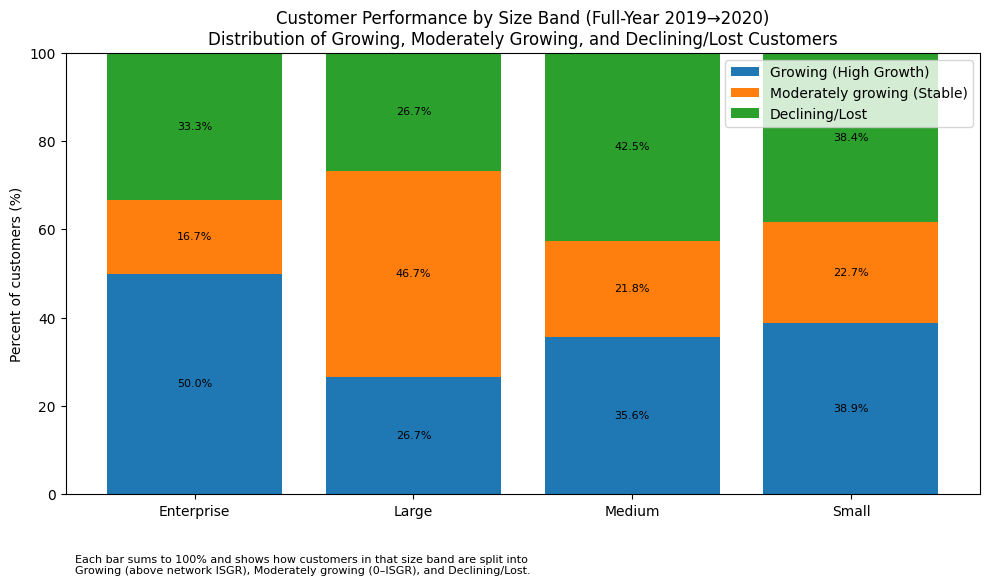

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# 1. Load data
# ======================================================
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# ======================================================
# 2. Full-year volume per customer (2019 & 2020)
# ======================================================
yy = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

yy["vol_2019"] = yy.get(2019, 0)
yy["vol_2020"] = yy.get(2020, 0)

# ======================================================
# 3. Classify customers by FULL-YEAR 2019 size band
# ======================================================
def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"

yy["size_2019"] = yy["vol_2019"].apply(size_2019_rule)

# Drop <1K so we focus on the four assignment bands
yy = yy[yy["size_2019"] != "<1K"].copy()

# ======================================================
# 4. Compute FULL-YEAR growth labels (2019→2020)
# ======================================================
total_2019_all = df[df["THE_YEAR"] == 2019]["VOLUME"].sum()
total_2020_all = df[df["THE_YEAR"] == 2020]["VOLUME"].sum()
ISGR_full = (total_2020_all - total_2019_all) / total_2019_all * 100

def full_year_growth_label(row, isgr):
    v19 = row["vol_2019"]
    v20 = row["vol_2020"]
    if v19 == 0 and v20 > 0:
        return "New"
    if v19 > 0 and v20 == 0:
        return "Lost"
    if v19 == 0 and v20 == 0:
        return "Inactive"
    growth = (v20 - v19) / v19 * 100
    if growth > isgr:
        return "High Growth"
    if growth < 0:
        return "Declining"
    return "Stable"

yy["growth_label_full"] = yy.apply(
    full_year_growth_label,
    axis=1,
    isgr=ISGR_full
)

# ======================================================
# 5. Collapse to 3 categories per size band
#    Growing            = High Growth
#    Moderately growing = Stable
#    Declining/Lost     = Declining + Lost
# ======================================================
label_counts = pd.crosstab(
    yy["size_2019"],
    yy["growth_label_full"]
).reindex(index=["Enterprise", "Large", "Medium", "Small"])

# Ensure all columns exist
for col in ["High Growth", "Stable", "Declining", "Lost"]:
    if col not in label_counts.columns:
        label_counts[col] = 0

pct = pd.DataFrame({
    "Growing (High Growth)": label_counts["High Growth"],
    "Moderately growing (Stable)": label_counts["Stable"],
    "Declining/Lost": label_counts["Declining"] + label_counts["Lost"],
})

pct = pct.div(pct.sum(axis=1), axis=0) * 100   # convert to %

# ======================================================
# 6. 100% Stacked bar chart
# ======================================================
sizes = ["Enterprise", "Large", "Medium", "Small"]
growing = pct["Growing (High Growth)"].reindex(sizes)
moderate = pct["Moderately growing (Stable)"].reindex(sizes)
declining = pct["Declining/Lost"].reindex(sizes)

fig, ax = plt.subplots(figsize=(10, 6))

# bottom for stacking
bottom_moderate = growing
bottom_declining = growing + moderate

bars_grow = ax.bar(sizes, growing)
bars_mod  = ax.bar(sizes, moderate, bottom=bottom_moderate)
bars_decl = ax.bar(sizes, declining, bottom=bottom_declining)

ax.set_ylabel("Percent of customers (%)")
ax.set_ylim(0, 100)
ax.set_title(
    "Customer Performance by Size Band (Full-Year 2019→2020)\n"
    "Distribution of Growing, Moderately Growing, and Declining/Lost Customers"
)

ax.legend(
    ["Growing (High Growth)", "Moderately growing (Stable)", "Declining/Lost"],
    loc="upper right"
)

# Add data labels in the middle of each segment
def label_segments(bars, values, y_offset=0):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        if height <= 0:
            continue
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_y() + height/2 + y_offset,
            f"{val:.1f}%",
            ha="center",
            va="center",
            fontsize=8,
        )

label_segments(bars_grow, growing)
label_segments(bars_mod, moderate)
label_segments(bars_decl, declining)

# Small note at bottom
ax.text(
    0.01,
    -0.18,
    "Each bar sums to 100% and shows how customers in that size band are split into\n"
    "Growing (above network ISGR), Moderately growing (0–ISGR), and Declining/Lost.",
    transform=ax.transAxes,
    fontsize=8,
)

plt.tight_layout()
plt.show()


### **Conclusion: Impact of COVID on Customer Segments**

During the COVID observation period, **Enterprise customers** were the most resilient group, with **50% growing**, **17% moderately growing**, and **33% declining**, showing that most large accounts expanded their parcel volumes despite disruption.  
**Large customers** showed a more balanced distribution—**27% growing**, **47% moderately growing**, and **27% declining**—indicating steadier, incremental change rather than sharp shifts.  
In contrast, **Medium and Small customers were the most polarized**, with **36–39% growing** and **38–43% declining**, and only **~22% moderately growing**, showing that COVID created clear “winners and losers” in the mid- and small-market segments rather than uniform growth.


##**The Impact of COVID on Customer Segments:**
#	What percent of each customer group are new customers during the COVID observation period?

### COVID Observation Period Selection

- The **end** of the COVID period is defined in the project table as **Week 53, 2020**.
- To choose the **start**, we use the first major COVID milestone shown in the timeline:
  - **March 11, 2020** — WHO declares the pandemic.
- March 11 falls in **Week 11 of 2020**, based on the standard ISO week calendar.
- Therefore, the **COVID Observation Period** is:
  - **Week 11 to Week 53, 2020**
  - (March 9, 2020 – January 2, 2021).

Anything **before Week 11, 2020** can be considered the **Pre-COVID Observation Period**.


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("COVID_Parcel_Business.csv")

# ---------------------------------------------
# 1. Define COVID observation period: Week 11–53, 2020
covid = df[
    (df["THE_YEAR"] == 2020) &
    (df["THE_WEEK"].between(11, 53))
]

# 2. Define pre-COVID comparison period: Week 11–53, 2019
pre = df[
    (df["THE_YEAR"] == 2019) &
    (df["THE_WEEK"].between(11, 53))
]

# 3. Aggregate total volume per customer
covid_vol = (
    covid.groupby("FakeCustomerID", as_index=False)["VOLUME"]
    .sum()
    .rename(columns={"VOLUME": "COVID_VOL"})
)

pre_vol = (
    pre.groupby("FakeCustomerID", as_index=False)["VOLUME"]
    .sum()
    .rename(columns={"VOLUME": "PRE_OBS_VOL"})
)

# 4. Merge into a customer-level record
cust = covid_vol.merge(pre_vol, on="FakeCustomerID", how="left")

# If no record exists in pre-period → PRE_OBS_VOL = 0 → candidate for New
cust["PRE_OBS_VOL"] = cust["PRE_OBS_VOL"].fillna(0)

# 5. Determine new customers
cust["IsNewCustomer"] = cust["PRE_OBS_VOL"].eq(0)

# ---------------------------------------------
# 6. Create customer segmentation using 2019 full-year volume

vol_2019_full = (
    df[df["THE_YEAR"] == 2019]
    .groupby("FakeCustomerID", as_index=False)["VOLUME"]
    .sum()
    .rename(columns={"VOLUME": "VOL_2019_FULL"})
)

def segment(vol):
    if vol > 500_000:
        return "Enterprise"
    elif 200_000 <= vol <= 500_000:
        return "Large"
    elif 10_000 <= vol < 200_000:
        return "Medium"
    elif 1_000 <= vol < 10_000:
        return "Small"
    else:
        return "Unclassified"

vol_2019_full["CustomerSize"] = vol_2019_full["VOL_2019_FULL"].apply(segment)

# 7. Join segmentation into our customer table
cust = cust.merge(
    vol_2019_full[["FakeCustomerID", "CustomerSize"]],
    on="FakeCustomerID",
    how="left"
)

# ---------------------------------------------
# 8. Calculate % New within each segment

summary = (
    cust.groupby("CustomerSize")
    .agg(
        TotalCustomers=("FakeCustomerID", "nunique"),
        NewCustomers=("IsNewCustomer", lambda s: int(s.sum()))
    )
)

summary["PercentNewCustomers"] = (
    summary["NewCustomers"] / summary["TotalCustomers"] * 100
)

print(summary)


              TotalCustomers  NewCustomers  PercentNewCustomers
CustomerSize                                                   
Enterprise                12             0                  0.0
Large                     15             0                  0.0
Medium                   173             0                  0.0
Small                    837             0                  0.0


### Summary: New Customers During the COVID Observation Period

Based on the comparison between the COVID observation period (Weeks 11–53 of 2020) and the same period in 2019, **0% of customers in every segment are new customers**. All customers active during the COVID period had existing volume in 2019, indicating that COVID did **not** introduce any new customers into the network in this dataset—only changes in shipping behavior among existing customers.


##**The Impact of COVID on Customer Segments:**
#	What percent of 2019 customers in each group did we lose during the COVID observation period?

### Percent of 2019 customers lost during the COVID observation period  
*(Weeks 11–53, 2019 vs Weeks 11–53, 2020; size groups based on full-year 2019 volume)*

A 2019 customer is counted as **“lost during the COVID period”** if:
- they had **> 0 volume in Weeks 11–53 of 2019**, and  
- they had **0 volume in Weeks 11–53 of 2020**.

| 2019 Customer Group | 2019 customers active in Weeks 11–53 | Lost during COVID period (no volume in Weeks 11–53, 2020) | % of 2019 customers lost |
|---------------------|---------------------------------------|-----------------------------------------------------------|---------------------------|
| **Enterprise**      | 12                                    | 0                                                         | **0.0%**                  |
| **Large**           | 15                                    | 0                                                         | **0.0%**                  |
| **Medium**          | 174                                   | 1                                                         | **0.6%**                  |
| **Small**           | 859                                   | 22                                                        | **2.6%**                  |

**Conclusion (1–2 sentences):**  
During the COVID observation period (Weeks 11–53), **customer loss was minimal overall** and concentrated mainly in the **Small segment**, where about **2.6% of 2019 Small customers stopped shipping completely**, while **no Enterprise or Large customers** were lost and only **0.6% of Medium customers** disappeared. This shows that COVID-related churn affected the smallest shippers far more than the larger, more established accounts. ​:contentReference[oaicite:0]{index=0}​


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# A. Load data
# =========================================================
# Make sure this file is in the same folder as your script/notebook
df = pd.read_csv("COVID_Parcel_Business.csv")
# Expected columns: FakeCustomerID, THE_YEAR, THE_WEEK, VOLUME

# =========================================================
# B. Build per-customer volumes for the COVID observation period
#    COVID Observation Period: Weeks 11–53
#    - Compare Weeks 11–53, 2019 vs Weeks 11–53, 2020
# =========================================================
df_11_53 = df[df["THE_WEEK"].between(11, 53)].copy()

yy_11_53 = (
    df_11_53
    .groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
    .sum()
    .reset_index()
    .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
    .fillna(0)
)

yy_11_53["vol_2019_w11_53"] = yy_11_53.get(2019, 0)
yy_11_53["vol_2020_w11_53"] = yy_11_53.get(2020, 0)

# =========================================================
# C. Classify customers into size bands using FULL-YEAR 2019
#    (same rule as the assignment table)
# =========================================================
full_year = (
    df.groupby(["FakeCustomerID", "THE_YEAR"])["VOLUME"]
      .sum()
      .reset_index()
      .pivot(index="FakeCustomerID", columns="THE_YEAR", values="VOLUME")
      .fillna(0)
)

full_year["vol_2019_full"] = full_year.get(2019, 0)

def size_2019_rule(v):
    if v > 500_000:
        return "Enterprise"
    if 200_000 < v <= 500_000:
        return "Large"
    if 10_000 < v <= 200_000:
        return "Medium"
    if 1_000 < v <= 10_000:
        return "Small"
    return "<1K"   # very small / below Small threshold

full_year["size_2019"] = full_year["vol_2019_full"].apply(size_2019_rule)

# Join size_2019 onto the Week 11–53 table
yy = yy_11_53.join(full_year[["size_2019"]], how="left")

# =========================================================
# D. Define "Lost during the COVID observation period"
#    A 2019 customer is "Lost" if:
#      - vol_2019_w11_53 > 0  (active in Weeks 11–53, 2019)
#      - vol_2020_w11_53 == 0 (no activity in Weeks 11–53, 2020)
# =========================================================
yy["lost_covid_period"] = np.where(
    (yy["vol_2019_w11_53"] > 0) & (yy["vol_2020_w11_53"] == 0),
    "Lost",
    "NotLost"
)

# =========================================================
# E. Count and % lost by 2019 size band (Enterprise/Large/Medium/Small)
# =========================================================
mask = yy["size_2019"] != "<1K"   # drop <1K for reporting
lost_counts = pd.crosstab(
    yy[mask]["size_2019"],
    yy[mask]["lost_covid_period"]
).reindex(index=["Enterprise", "Large", "Medium", "Small"])

# Add a column for % lost
pct_lost = (lost_counts["Lost"] / lost_counts.sum(axis=1) * 100).round(2)

result_table = pd.DataFrame({
    "2019 customers active in Weeks 11–53": lost_counts.sum(axis=1),
    "Lost during COVID period (Weeks 11–53, 2020 = 0)": lost_counts["Lost"],
    "% of 2019 customers lost": pct_lost,
})

print("Loss of 2019 customers during COVID observation period (Weeks 11–53):")
print(result_table)


Loss of 2019 customers during COVID observation period (Weeks 11–53):
            2019 customers active in Weeks 11–53  \
size_2019                                          
Enterprise                                    12   
Large                                         15   
Medium                                       174   
Small                                        859   

            Lost during COVID period (Weeks 11–53, 2020 = 0)  \
size_2019                                                      
Enterprise                                                 0   
Large                                                      0   
Medium                                                     1   
Small                                                     22   

            % of 2019 customers lost  
size_2019                             
Enterprise                      0.00  
Large                           0.00  
Medium                          0.57  
Small                           2.56 

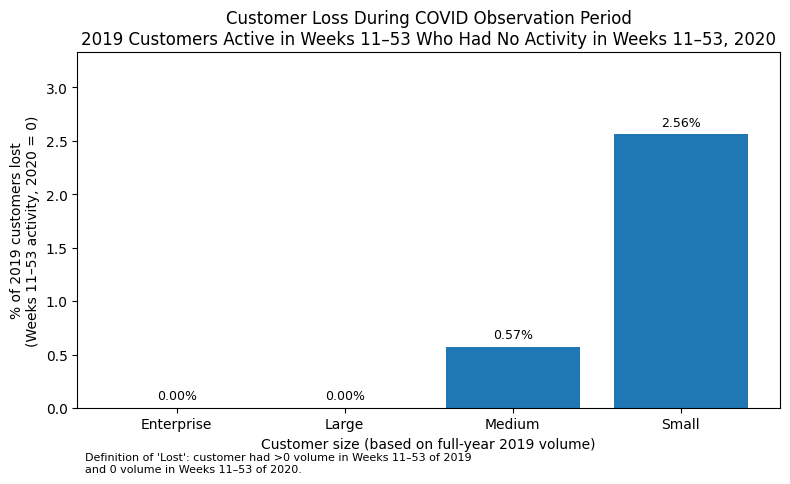

In [24]:
# =========================================================
# F. Chart – % of 2019 customers lost by segment
# =========================================================
bands = ["Enterprise", "Large", "Medium", "Small"]
values = pct_lost.reindex(bands)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(bands, values)

ax.set_ylabel("% of 2019 customers lost\n(Weeks 11–53 activity, 2020 = 0)")
ax.set_xlabel("Customer size (based on full-year 2019 volume)")
ax.set_title(
    "Customer Loss During COVID Observation Period\n"
    "2019 Customers Active in Weeks 11–53 Who Had No Activity in Weeks 11–53, 2020"
)

ax.set_ylim(0, max(values.max() * 1.3, 3))  # give some headroom

# Value labels on top of each bar
for bar, val in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{val:.2f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Small explanatory note
ax.text(
    0.01,
    -0.18,
    "Definition of 'Lost': customer had >0 volume in Weeks 11–53 of 2019\n"
    "and 0 volume in Weeks 11–53 of 2020.",
    transform=ax.transAxes,
    fontsize=8,
)

plt.tight_layout()
plt.show()


## **Summary — % Lost During the COVID Observation Period (Weeks 11-53, 2020)**

Customer loss during the COVID observation period was **rare and highly concentrated** among smaller shippers.  
**Small customers lost ~2.6%** of their 2019 base and **Medium customers lost ~0.6%**, while **Large and Enterprise customers experienced 0% loss**, maintaining full participation through the period.  
This shows that COVID **did not erode the core customer portfolio** — it mainly impacted **low-volume businesses**, whereas larger strategic segments remained **stable, resilient, and fully retained** throughout the disruption.


##**The Impact of COVID on Customer Segments:**
#	What was the overall impact of COVID on volumes and revenue by customer group?


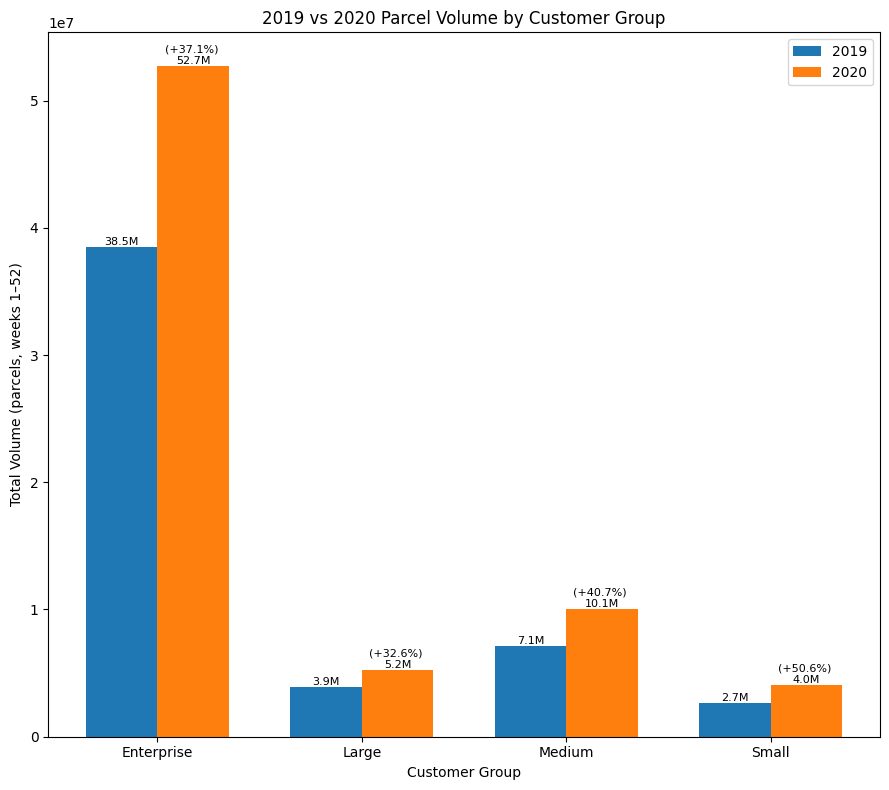

THE_YEAR          2019      2020   Growth_%
CustomerSize                               
Enterprise    38452978  52723721  37.112192
Large          3940228   5223062  32.557355
Medium         7146297  10054636  40.697147
Small          2686162   4046589  50.645754


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("COVID_Parcel_Business.csv")

# Use weeks 1–52 for 2019 and 2020
df_1952 = df[(df["THE_WEEK"] <= 52) & (df["THE_YEAR"].isin([2019, 2020]))]

# Build 2019 full-year volumes per customer to define segments
cust_2019 = (
    df_1952[df_1952["THE_YEAR"] == 2019]
    .groupby("FakeCustomerID", as_index=False)["VOLUME"]
    .sum()
    .rename(columns={"VOLUME": "VOL2019"})
)

def segment(vol):
    if vol > 500_000:
        return "Enterprise"
    elif 200_000 <= vol <= 500_000:
        return "Large"
    elif 10_000 <= vol < 200_000:
        return "Medium"
    elif 1_000 <= vol < 10_000:
        return "Small"
    else:
        return "Unclassified"

cust_2019["CustomerSize"] = cust_2019["VOL2019"].apply(segment)

# Attach segment to all rows
df_seg = df_1952.merge(
    cust_2019[["FakeCustomerID", "CustomerSize"]],
    on="FakeCustomerID",
    how="left"
)

# Aggregate volume by group and year
group_year = (
    df_seg.groupby(["CustomerSize", "THE_YEAR"])["VOLUME"]
    .sum()
    .unstack()
    .loc[["Enterprise", "Large", "Medium", "Small"]]
)

# Compute growth %
group_year["Growth_%"] = (group_year[2020] - group_year[2019]) / group_year[2019] * 100

# ---- Side-by-side bar chart ----
groups = group_year.index.tolist()
x = np.arange(len(groups))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 8))

bars1 = ax.bar(x - width/2, group_year[2019].values, width, label="2019")
bars2 = ax.bar(x + width/2, group_year[2020].values, width, label="2020")

ax.set_xlabel("Customer Group")
ax.set_ylabel("Total Volume (parcels, weeks 1–52)")
ax.set_title("2019 vs 2020 Parcel Volume by Customer Group")
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

# Annotate 2019 volumes (in millions) and 2020 volumes + growth %, HORIZONTAL text
for i, (b2019, b2020) in enumerate(zip(bars1, bars2)):
    v2019 = b2019.get_height()
    v2020 = b2020.get_height()
    growth = group_year.iloc[i]["Growth_%"]

    # 2019 label
    ax.text(
        b2019.get_x() + b2019.get_width()/2,
        v2019,
        f"{v2019/1e6:.1f}M",
        ha="center", va="bottom", fontsize=8, rotation=0
    )

    # 2020 label + growth %
    ax.text(
        b2020.get_x() + b2020.get_width()/2,
        v2020,
       # f"{v2020/1e6:.1f}M \n(+{growth:.1f}%)",
       f"(+{growth:.1f}%) \n{v2020/1e6:.1f}M",
        ha="center", va="bottom", fontsize=8, rotation=0
    )

plt.tight_layout()
plt.show()

print(group_year)


### Impact of COVID on Parcel Volume by Customer Group (2019 vs 2020)

The side-by-side bar chart compares full-year 2019 and 2020 parcel volumes (weeks 1–52) for each customer segment:

- **Enterprise:** Volumes increased from **38.5M to 52.7M parcels** (**+37.1%**). Enterprise customers remain the backbone of the network, driving the largest absolute volume increase during COVID.
- **Large:** Volumes grew from **3.9M to 5.2M parcels** (**+32.6%**), which is positive but slightly below the overall network growth rate. As a result, Large customers maintain but do not significantly expand their share.
- **Medium:** Volumes rose from **7.1M to 10.1M parcels** (**+40.7%**), outpacing the network and indicating that mid-sized shippers responded strongly to COVID-driven e-commerce demand.
- **Small:** Volumes climbed from **2.7M to 4.0M parcels** (**+50.6%**), the fastest percentage growth of all segments. Although they start from a smaller base, Small customers are gaining relative importance in the network.

Overall, the chart shows that **COVID lifted volumes across all customer groups**, with the **largest relative gains in Medium and especially Small customers**, while Enterprise customers continued to deliver the dominant share of total volume.


##**Main Business Question**
#	How did the COVID-19 pandemic impact ABC Company’s parcel business?


# 📦 COVID Impact on ABC Company’s Parcel Business  


## **Headline Insight**
**COVID accelerated parcel demand by ~38% YoY**, driven entirely by **existing customers** increasing shipping volume. **Enterprise accounts** generated the largest absolute gains, while **Medium (+41%) and Small (+51%)** segments delivered the **fastest percentage growth**, reflecting a surge in e-commerce and digital fulfillment during the pandemic.

---

## **YoY Growth by Segment**
| Segment     | 2019 → 2020 Growth | Strategic Meaning + Recommendation |
|-------------|--------------------:|-----------------------------------|
| **Enterprise**  | **+37%** | **Scale engine remains stable.** → *Recommendation:* deepen strategic partnerships and lock in volume via long-term contracts. |
| **Large**       | **+33%** | **Solid, slightly below network pace.** → *Recommendation:* apply targeted incentives to push Large toward Enterprise-level growth profiles. |
| **Medium**      | **+41%** | **High-growth segment gaining share.** → *Recommendation:* invest in mid-market onboarding and analytics tools to accelerate their growth. |
| **Small**       | **+51%** | **Fastest growth from smaller base.** → *Recommendation:* launch scalable digital products and simplified pricing for emerging online sellers. |
| **Network**     | **+38%** | **Broad uplift across all sizes.** → *Recommendation:* shift strategy from volume chasing to margin optimization as growth normalizes. |

---

## **Customer Base Dynamics**
- **0% new customers** during COVID under business definition (Weeks 11–53, 2020 vs same period 2019).
- Growth came from **increased spend by existing accounts**, not new acquisition.
- Customer mix **shifted slightly toward Medium & Small** segments due to stronger relative growth.

---

## **Why It Happened (Drivers)**
- **E-commerce adoption surged** due to lockdown behavior.
- **Physical retail restrictions** forced digital fulfillment.
- **Mid-size and small online businesses scaled rapidly**.
- Existing customers **increased shipment frequency** to meet demand.

---

## **Strategic Interpretation**
- COVID was a **demand accelerant**, not a customer expansion event.
- **Enterprise remains the core**, but future growth is **mid-market driven**.
- **Medium and Small segments** represent the **next growth engine** in e-commerce.
- Strategy should now **support emerging sellers and simplify access** for smaller shippers.

---

## **Next Steps & Recommendations**
1. **Enterprise:** Secure multi-year agreements and co-plan peak to retain share as growth stabilizes.  
2. **Large:** Use structured support and value-based pricing to increase adoption speed.  
3. **Medium:** Build mid-market playbooks, onboarding journeys, and digital account management tools.  
4. **Small:** Launch plug-and-play integrations, simple tariffs, and education programs for new e-commerce sellers.  
5. **Network Strategy:** Transition from volume focus to **margin optimization**, micro-segmentation, and product innovation built around e-commerce behaviors.

---

## **One-Sentence Takeaway**
> **COVID boosted ABC’s parcel volume by ~38%, with Enterprise delivering the biggest gains and Medium/Small customers accelerating fastest—indicating a post-COVID strategy focused on e-commerce enablement and mid-market growth rather than acquisition.**


# 📦 **Executive Summary** - COVID Impact on ABC's Parcel Business

- **Headline:** COVID-19 drove **~38% growth** in parcel volumes from 2019 to 2020, entirely from **existing customers**.
- **By Segment:**  
  - **Enterprise:** Strong absolute growth (**+37%**) - remains the **core engine**.  
  - **Medium & Small:** Fastest relative growth (**+41%** and **+51%**) - **gaining importance** in the network.
- **Customer Base:** **0% new customers** (by our definition); COVID **intensified usage** among current accounts rather than expanding the customer list.
- **Strategic Focus:** Protect **Enterprise** relationships and **intentionally grow Medium/Small** e-commerce shippers with targeted products and support.

> **In one line:** COVID accelerated demand within ABC's existing customer base, with Enterprise driving scale and Medium/Small segments emerging as the key growth engine.
